<a href="https://colab.research.google.com/github/sergiomath/dataScience/blob/main/Arboles_de_desicion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os 
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from graphviz  import Source

In [2]:
##Importamos desde github

df = pd.read_csv("https://raw.githubusercontent.com/sergiomath/dataScience/main/Proyectos/Diabetes/diabetes.csv")

In [3]:
###Quitamos ceros de las columnas por su media o su mediana(imputacion de datos BASICA) #####

df['Glucose'] = df['Glucose'].replace(0,df['Glucose'].median()) ##Remmplazamos los 0 en glucosa por la media 

df['BloodPressure'] = df['BloodPressure'].replace(0,df['BloodPressure'].median()) ##reemplazamos con la mediana

df['BMI'] = df['BMI'].replace(0, df['BMI'].median())##reemplazamos con la mediana

df['SkinThickness'] = df['SkinThickness'].replace(0, df['SkinThickness'].median())##reemplazamos con la mediana

df['Insulin'] = df['Insulin'].replace(0, df['Insulin'].median())##reemplazamos con la mediana

In [4]:
colnames=df.columns.values.tolist()
colnames
predictores=colnames[:8]
objetivo=colnames[8]

In [5]:
###### particionado del dataset######
df['is_train']=np.random.uniform(0,1,len(df))<=0.75
train,test=df[df['is_train']==True],df[df['is_train']==False]

In [6]:
Entre_val, prueba, Entre_val_clase, prueba_clase = train_test_split(
    df[["Pregnancies","Glucose","BloodPressure","SkinThickness","Insulin",
        "BMI","DiabetesPedigreeFunction","Age"]],
    df[["Outcome"]],
    test_size= 0.25,
    random_state= 4
)

In [7]:
arbol=DecisionTreeClassifier(criterion='entropy',random_state=99,min_samples_leaf=6,max_depth=6)
arbol.fit(train[predictores],train[objetivo]) 

DecisionTreeClassifier(criterion='entropy', max_depth=6, min_samples_leaf=6,
                       random_state=99)

In [8]:
predicciones=arbol.predict(test[predictores])

In [9]:
pd.crosstab(test[objetivo],predicciones,rownames=['Actual'],colnames=['Predicciones'])

Predicciones,0,1
Actual,,
0,80,33
1,19,40


In [10]:
### Visualizacion del arbol ####
with open('diabetes.dot','w') as dotfile :
   export_graphviz(arbol,out_file=dotfile,feature_names=predictores)
   dotfile.close()

In [11]:
file=open('diabetes.dot','r')
text=file.read()
text

'digraph Tree {\nnode [shape=box, fontname="helvetica"] ;\nedge [fontname="helvetica"] ;\n0 [label="Glucose <= 127.5\\nentropy = 0.935\\nsamples = 596\\nvalue = [387, 209]"] ;\n1 [label="BMI <= 26.45\\nentropy = 0.709\\nsamples = 382\\nvalue = [308, 74]"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label="DiabetesPedigreeFunction <= 0.675\\nentropy = 0.079\\nsamples = 102\\nvalue = [101, 1]"] ;\n1 -> 2 ;\n3 [label="entropy = 0.0\\nsamples = 86\\nvalue = [86, 0]"] ;\n2 -> 3 ;\n4 [label="BMI <= 23.8\\nentropy = 0.337\\nsamples = 16\\nvalue = [15, 1]"] ;\n2 -> 4 ;\n5 [label="entropy = 0.65\\nsamples = 6\\nvalue = [5, 1]"] ;\n4 -> 5 ;\n6 [label="entropy = 0.0\\nsamples = 10\\nvalue = [10, 0]"] ;\n4 -> 6 ;\n7 [label="Age <= 28.5\\nentropy = 0.828\\nsamples = 280\\nvalue = [207, 73]"] ;\n1 -> 7 ;\n8 [label="BMI <= 30.95\\nentropy = 0.521\\nsamples = 145\\nvalue = [128, 17]"] ;\n7 -> 8 ;\n9 [label="BloodPressure <= 80.0\\nentropy = 0.144\\nsamples = 49\\nvalue = [48, 

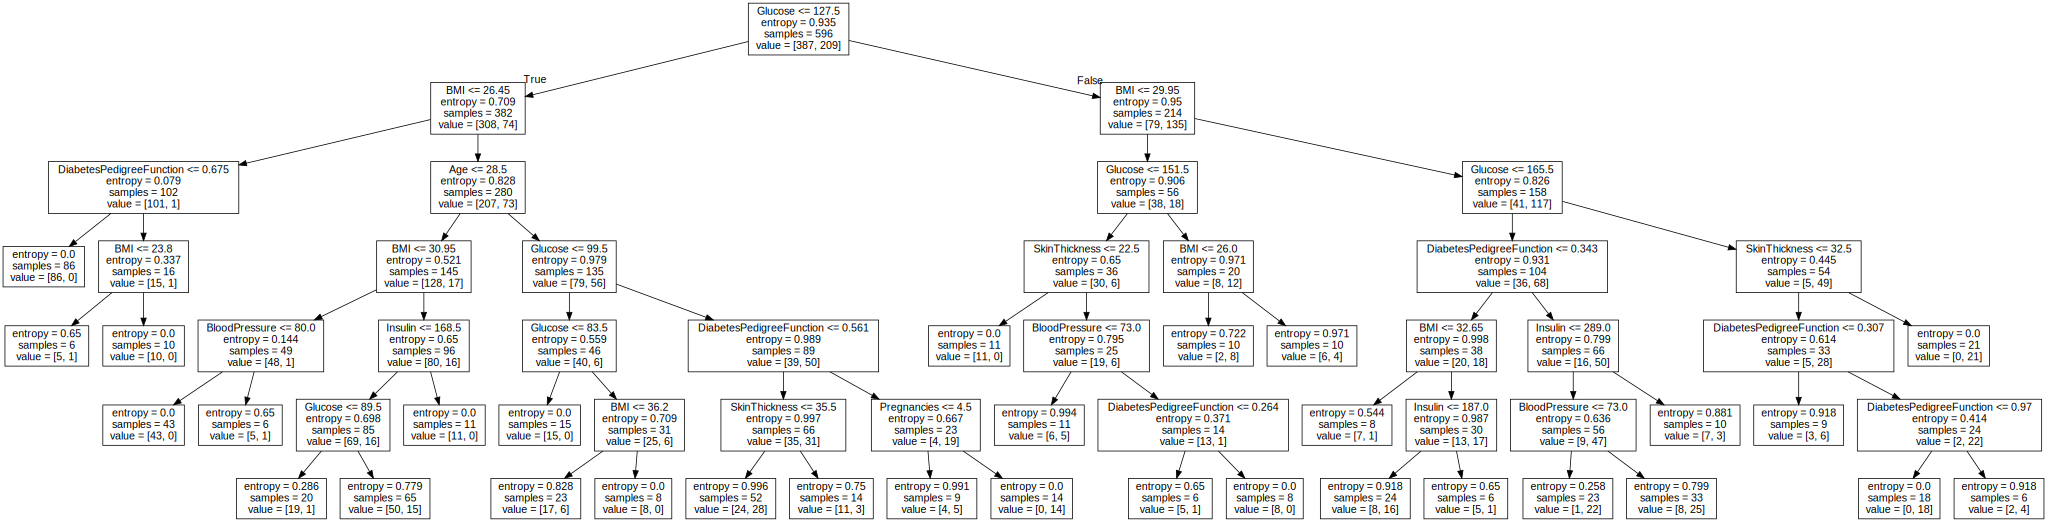

In [12]:
Source(text)

In [13]:
###Cross Validation 
X=df[predictores]
Y=df[objetivo]
arbol=DecisionTreeClassifier(criterion='entropy',random_state=30,min_samples_leaf=6,max_depth=6)
arbol.fit(X,Y)

DecisionTreeClassifier(criterion='entropy', max_depth=6, min_samples_leaf=6,
                       random_state=30)

In [14]:
cv=KFold(n_splits=6,random_state=30,shuffle=True)

In [15]:
score=np.mean(cross_val_score(arbol,X,Y,scoring='accuracy',cv=cv,n_jobs=1))
score

0.7122395833333334

In [16]:
print(predictores)
for i in range(1,11):
  arbol=DecisionTreeClassifier(criterion='entropy',random_state=30,min_samples_leaf=6,max_depth=i)
  arbol.fit(X,Y)
  cv=KFold(n_splits=10,random_state=1,shuffle=True)
  score=np.mean(cross_val_score(arbol,X,Y,scoring='accuracy',cv=cv,n_jobs=1))
  print('Score para i =',i,' es de ', score)
  print('   ',arbol.feature_importances_)

['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
Score para i = 1  es de  0.7225393028024608
    [0. 1. 0. 0. 0. 0. 0. 0.]
Score para i = 2  es de  0.7485475051264525
    [0.         0.60945904 0.         0.         0.         0.39054096
 0.         0.        ]
Score para i = 3  es de  0.7459842788790157
    [0.         0.55928824 0.         0.         0.         0.29334802
 0.01237407 0.13498967]
Score para i = 4  es de  0.7407552973342447
    [0.         0.53313329 0.         0.00672545 0.01443529 0.29017261
 0.01042514 0.14510822]
Score para i = 5  es de  0.7407723855092276
    [0.         0.45767636 0.04065156 0.00577356 0.03728555 0.25417888
 0.07986373 0.12457036]
Score para i = 6  es de  0.7382091592617909
    [0.01797096 0.4049784  0.0721842  0.00499113 0.03223262 0.24516552
 0.11478855 0.10768861]
Score para i = 7  es de  0.7474025974025974
    [0.04666257 0.36529088 0.06090528 0.00443492 0.02864064 0.24218434
 0